In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath)

df_head = df.head()
df_info = df.info()
df_describe = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_head

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_info

In [7]:
df_describe

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [10]:
df_cleaned = df.dropna()

df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

df_cleaned = remove_outliers(df_cleaned, 'MonthlyCharges')
df_cleaned = remove_outliers(df_cleaned, 'tenure')
df_cleaned = remove_outliers(df_cleaned, 'TotalCharges')

df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

df_cleaned_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,True,False,False,True,True,...,False,False,False,True,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,False,True,True,False,True,...,True,False,True,False,False,False,False,True,True,False
2,3668-QPYBK,0,2,53.85,108.15,False,True,True,False,True,...,False,False,False,True,False,False,False,True,False,True
3,7795-CFOCW,0,45,42.30,1840.75,False,True,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,9237-HQITU,0,2,70.70,151.65,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True


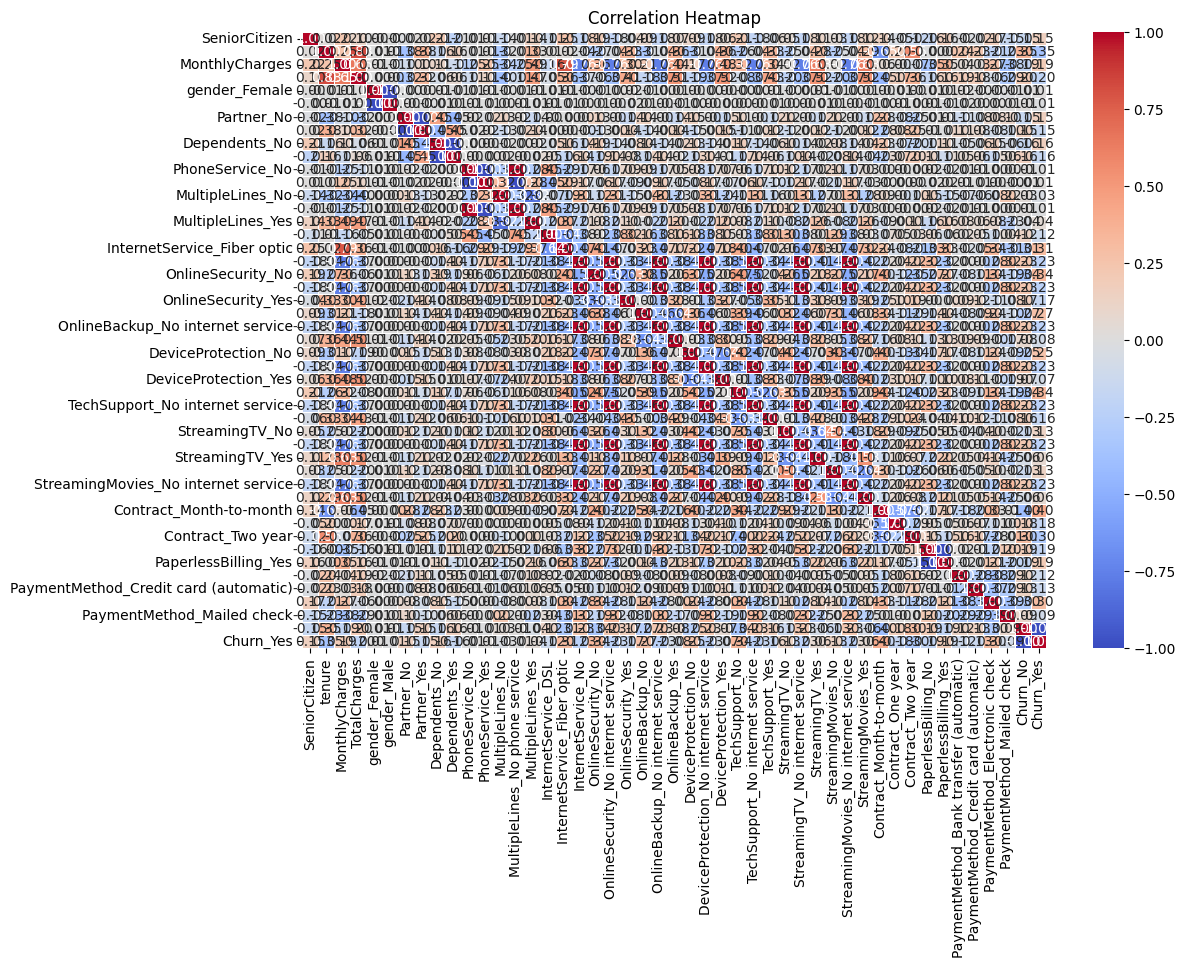

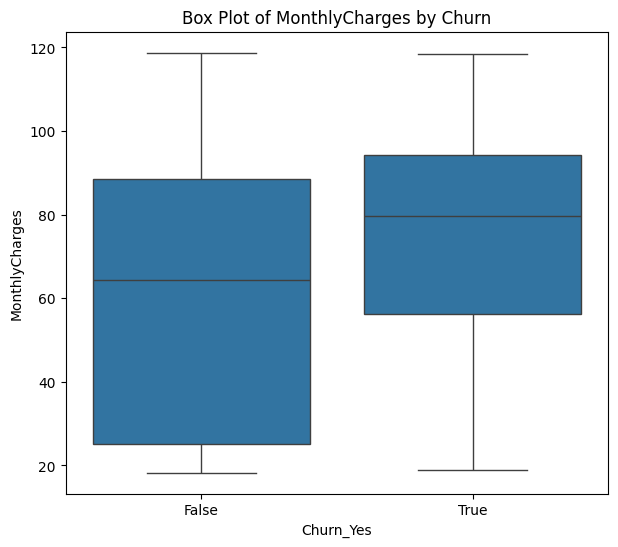

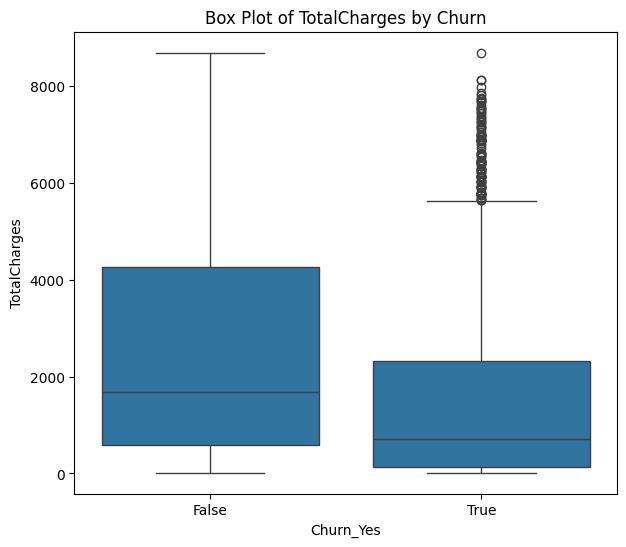

In [14]:
# Drop non-numeric columns like 'customerID' before generating the correlation heatmap
df_cleaned_encoded = df_cleaned_encoded.drop(columns=['customerID'], errors='ignore')

# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Box Plot for MonthlyCharges by Churn
plt.figure(figsize=(7, 6))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df_cleaned_encoded)
plt.title('Box Plot of MonthlyCharges by Churn')
plt.show()

# 3. Box Plot for TotalCharges by Churn
plt.figure(figsize=(7, 6))
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df_cleaned_encoded)
plt.title('Box Plot of TotalCharges by Churn')
plt.show()


Confusion Matrix:
 [[1549    0]
 [   0  561]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1549
        True       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


ROC AUC Score: 1.0


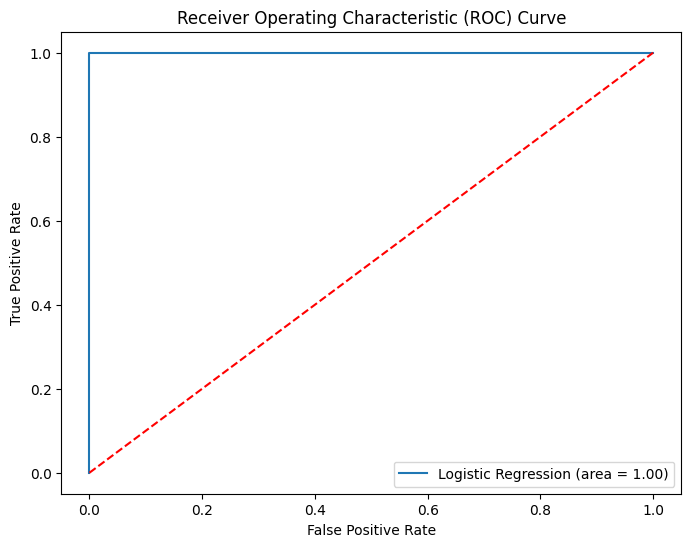

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Split the data into training and testing sets
X = df_cleaned_encoded.drop(columns=['Churn_Yes'])  # Features
y = df_cleaned_encoded['Churn_Yes']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Random Forest Confusion Matrix:
 [[1549    0]
 [   0  561]]

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1549
        True       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


Random Forest ROC AUC Score: 1.0


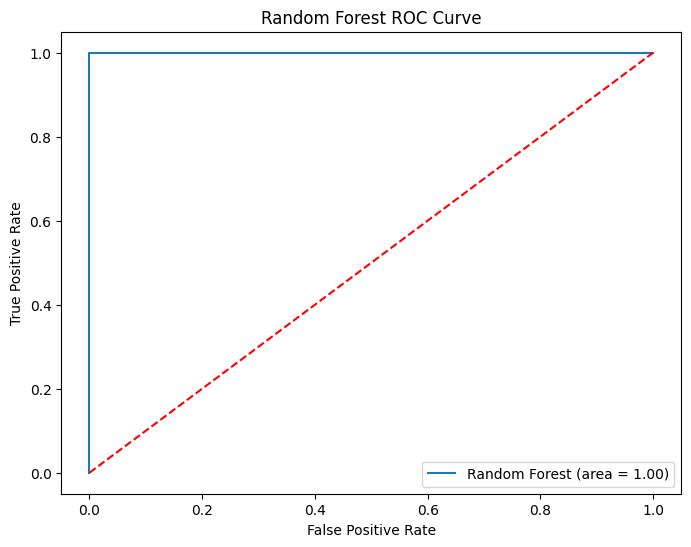

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_rf))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


SVM Confusion Matrix:
 [[1549    0]
 [ 561    0]]

SVM Classification Report:
               precision    recall  f1-score   support

       False       0.73      1.00      0.85      1549
        True       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110


SVM ROC AUC Score: 0.7883954802649976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


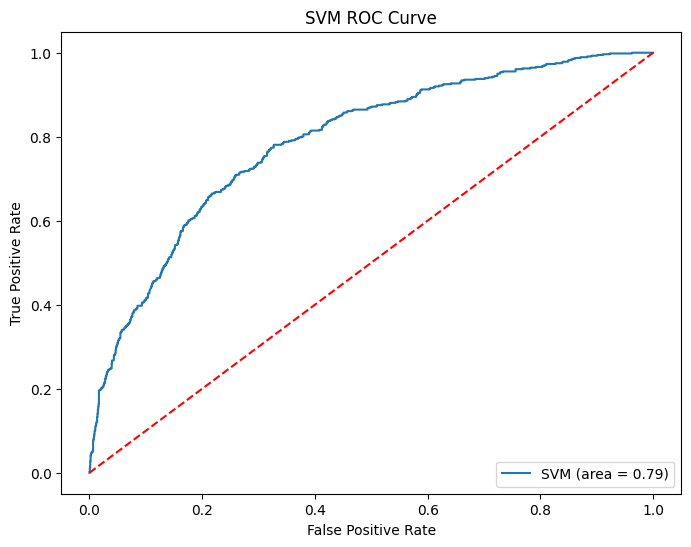

In [17]:
from sklearn.svm import SVC

# Initialize the SVM model with probability estimates
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nSVM ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_svm))

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_svm))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()


XGBoost Confusion Matrix:
 [[1549    0]
 [   0  561]]

XGBoost Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1549
        True       1.00      1.00      1.00       561

    accuracy                           1.00      2110
   macro avg       1.00      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110


XGBoost ROC AUC Score: 1.0


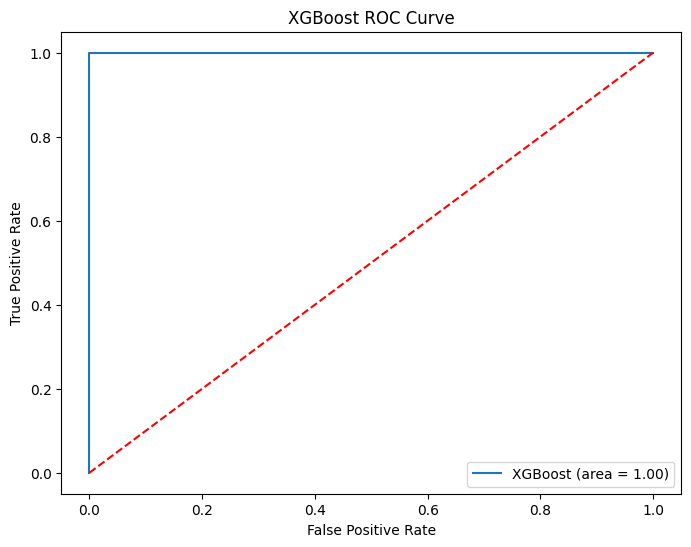

In [18]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_xgb))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()


KNN Confusion Matrix:
 [[1394  155]
 [ 292  269]]

KNN Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1549
        True       0.63      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110


KNN ROC AUC Score: 0.7609411626614375


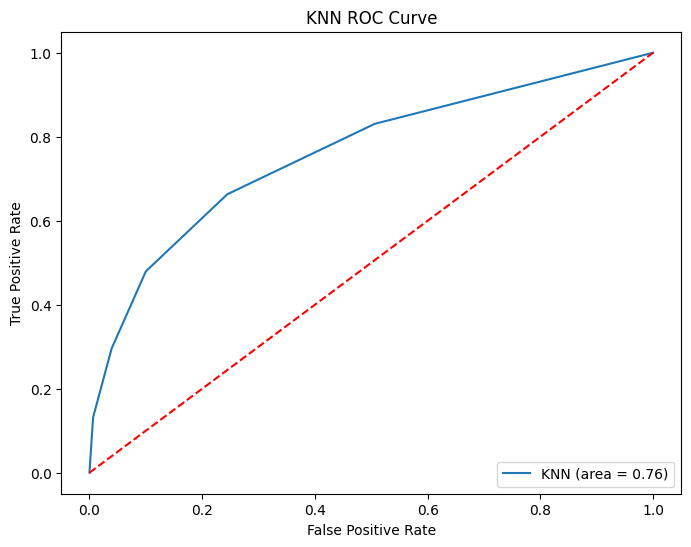

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_knn))

# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_knn))
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()
